In [153]:
import pandas as pd

df = pd.read_csv("green_tripdata_2015-12.csv", usecols=["lpep_pickup_datetime"])
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
flow = df.resample('10min', on='lpep_pickup_datetime').size()
print(flow)

lpep_pickup_datetime
2015-12-01 00:00:00     246
2015-12-01 00:10:00     182
2015-12-01 00:20:00     164
2015-12-01 00:30:00     162
2015-12-01 00:40:00     149
                       ... 
2015-12-31 23:10:00    1062
2015-12-31 23:20:00    1111
2015-12-31 23:30:00     974
2015-12-31 23:40:00     867
2015-12-31 23:50:00     630
Freq: 10min, Length: 4464, dtype: int64


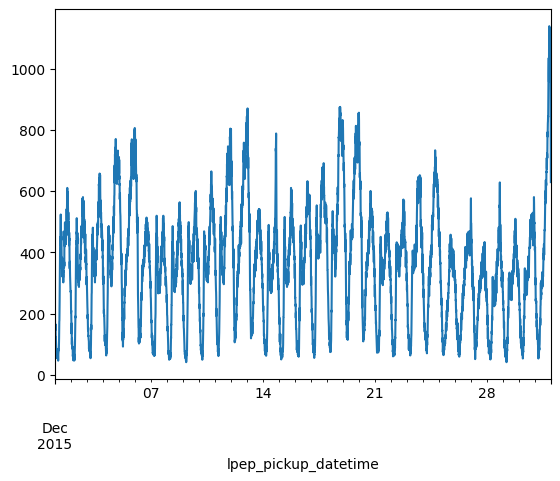

In [154]:
from matplotlib import pyplot as plt
flow.plot()
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
import numpy as np

X = flow.index.view("int").reshape(-1, 1)
y = flow.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [156]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
r2 = model.score(X_test, y_test)

print(f"LR MSE: {mse}, R2: {r2}")

LR MSE: 37205.00425979393, R2: -0.0023253907573723698


In [167]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=30)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)
dt_mse = np.mean((y_test - dt_y_pred) ** 2)
dt_r2 = dt_model.score(X_test, y_test)
print(f"Decision Tree MSE: {dt_mse}, R2: {dt_r2}")

Decision Tree MSE: 850.043673012318, R2: 0.9770993076425031


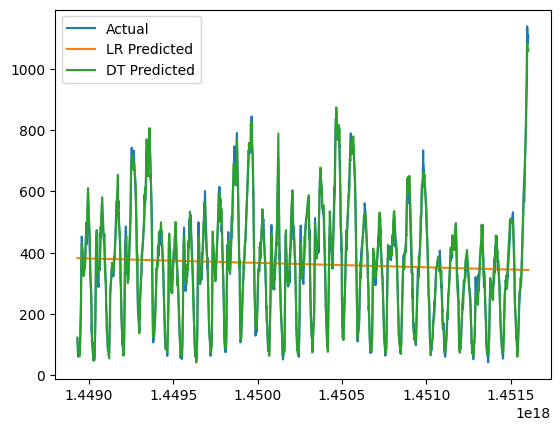

In [168]:
sort_idx = np.argsort(X_test.flatten())
plt.plot(X_test[sort_idx], y_test[sort_idx], label="Actual")
plt.plot(X_test[sort_idx], y_pred[sort_idx], label="LR Predicted")
plt.plot(X_test[sort_idx], dt_y_pred[sort_idx], label="DT Predicted")
plt.legend()
plt.show()

根据图像可以知道交通流量有明显的周期性，使用15以上深度的决策树性能要明显好于普通线性模型